# Voorbeeld van omzetting door Veg2Hab

Dit notebook doorloopt alle stappen die tot nu toe geimplementeerd zijn voor Veg2Hab. Het is een voorbeeld van hoe de omzetting van vegetatie naar habitattypekaart kan verlopen.

Eerst worden alle benodigde resources geinstantieerd (was-wordt lijst, definitietabel, fgr-kaart). Hierna wordt de omzetting stap voor stap uitgevoerd.

In [1]:
from pathlib import Path

import sys
sys.path.append('../')

from veg2hab.waswordtlijst import WasWordtLijst, opschonen_waswordtlijst
from veg2hab.definitietabel import DefinitieTabel, opschonen_definitietabel
from veg2hab.vegkartering import Kartering
from veg2hab.io.cli import CLIInterface
import pandas as pd
from veg2hab.bronnen import FGR, Bodemkaart, LBK

pd.set_option('display.max_columns', 100)

CLIInterface.get_instance()

/home/jordydelange/.cache/pypoetry/virtualenvs/veg2hab-CuqoUkZb-py3.7/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


### Was-Wordt lijst opschonen en inladen

VvN en SBB codes worden gecheckt op validiteit bij:
1. het opschonen van een was-wordt lijst
2. bij het inlezen van een opgeschoonde was-wordt lijst

In [2]:
path_in_wwl = Path("../data/5. Was-wordt-lijst-vegetatietypen-en-habitattypen-09-02-2021.xlsx")
path_out_wwl = Path("../testing/opgeschoonde_waswordt.xlsx")
opschonen_waswordtlijst(path_in_wwl, path_out_wwl)
wwl = WasWordtLijst.from_excel(path_out_wwl)
wwl.df.head(3)

/home/jordydelange/.cache/pypoetry/virtualenvs/veg2hab-CuqoUkZb-py3.7/lib/python3.7/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Alle SBB codes zijn valide
Alle VvN codes zijn valide
Alle SBB codes zijn valide
Alle VvN codes zijn valide


,VvN,SBB
0,14rg10,14-l
1,None,7-a
2,None,8b-b


### Definitietabel opschonen en inladen

VvN- en SBB-codes worden gecheckt op validiteit bij:
1. het opschonen van een definitietabel
2. bij het inlezen van een opgeschoonde definitietabel

In [3]:
path_in_dt = Path("../data/definitietabel habitattypen (versie 24 maart 2009)_0.xls")
path_in_mitsjson = Path("../data/mitsjson.json")
path_in_mozaiekjson = Path("../data/mozaiekjson.json")
path_out_dt = Path("../testing/opgeschoonde_definitietabel.xlsx")
opschonen_definitietabel(path_in_dt, path_in_mitsjson, path_in_mozaiekjson, path_out_dt)
dt = DefinitieTabel.from_excel(path_out_dt)
dt.df.head()

Alle SBB codes zijn valide
Alle VvN codes zijn valide


,DT regel,Habitattype,Kwaliteit,SBB,VvN,mits,mozaiek,mitsjson,mozaiekjson,Criteria,Mozaiekregel
0,2,H1110_A,Kwaliteit.GOED,50a,None,mits in de slikkige en fijnzandige delen van F...,<NA>,"{""type"": ""EnCriteria"", ""sub_criteria"": [{""type...","{""type"": ""GeenMozaiekregel""}",((FGR is Getijdengebied of FGR is Noordzee) en...,Geen mozaiekregel (altijd waar)
1,3,H1110_A,Kwaliteit.GOED,50b,None,mits in de slikkige en fijnzandige delen van F...,<NA>,"{""type"": ""EnCriteria"", ""sub_criteria"": [{""type...","{""type"": ""GeenMozaiekregel""}",((FGR is Getijdengebied of FGR is Noordzee) en...,Geen mozaiekregel (altijd waar)
2,4,H1110_A,Kwaliteit.GOED,50c,None,mits in de slikkige en fijnzandige delen van F...,<NA>,"{""type"": ""EnCriteria"", ""sub_criteria"": [{""type...","{""type"": ""GeenMozaiekregel""}",((FGR is Getijdengebied of FGR is Noordzee) en...,Geen mozaiekregel (altijd waar)
3,5,H1110_B,Kwaliteit.GOED,50a,None,mits in de grofzandige delen van FGR Getijdeng...,<NA>,"{""type"": ""EnCriteria"", ""sub_criteria"": [{""type...","{""type"": ""GeenMozaiekregel""}",((FGR is Getijdengebied of FGR is Noordzee) en...,Geen mozaiekregel (altijd waar)
4,6,H1110_B,Kwaliteit.GOED,50b,None,mits in de grofzandige delen van FGR Getijdeng...,<NA>,"{""type"": ""EnCriteria"", ""sub_criteria"": [{""type...","{""type"": ""GeenMozaiekregel""}",((FGR is Getijdengebied of FGR is Noordzee) en...,Geen mozaiekregel (altijd waar)


## Inladen van een kartering vanaf een shapefile

In [4]:
shp_path = Path("../testing/vegetatiekarteringen/GR/SGL Hunzedal en Leekstermeer2021/2021 Vegetatiekartering Leekstermeer2021/GIS bestanden Onlanden 2021/Vegetatiekartering_Leekstermeer2021.shp")
Kartering.from_shapefile(shp_path, vegtype_col_format="single", sbb_of_vvn="SBB", ElmID_col="elmid", SBB_col=["SBBTYPE"], VvN_col=[], split_char="+", lok_vegtypen_col=["Vegtype"]).gdf

,ElmID,_LokVegTyp,geometry,SBBTYPE,Datum,Opmerking,SBBTYPE1,SBBTYPE2,SBBTYPE3,Opp,_LokVrtNar,perc_0,perc_1,perc_2,VegTypeInfo
0,144,C3a+F1b,"POLYGON ((225536.382 578550.118, 225536.613 57...",08C-a+16-a,None,None,8c-a,16-a,None,1692.139818,Lokale typologie is primair vertaald naar SBB,50.0,50.0,0.0,"[(50.0%, SBB: ['8c-a'], VvN: []), (50.0%, SBB:..."
1,143,B3c+C2c,"POLYGON ((225518.346 578389.608, 225514.596 57...",08-a+08C2c,None,None,8-a,8c2c,None,2974.448552,Lokale typologie is primair vertaald naar SBB,50.0,50.0,0.0,"[(50.0%, SBB: ['8-a'], VvN: []), (50.0%, SBB: ..."
2,73,F1b,"POLYGON ((225398.991 578372.192, 225399.792 57...",16-a,None,None,16-a,None,None,4582.870987,Lokale typologie is primair vertaald naar SBB,100.0,0.0,0.0,"[(100.0%, SBB: ['16-a'], VvN: [])]"
3,62,H1a+A1,"POLYGON ((225338.120 578506.385, 225330.908 57...",12B1d+50A,None,None,12b1d,50a,None,2843.780077,Lokale typologie is primair vertaald naar SBB,50.0,50.0,0.0,"[(50.0%, SBB: ['12b1d'], VvN: []), (50.0%, SBB..."
4,111,A1+B1,"POLYGON ((225731.271 578748.007, 225730.075 57...",50A+08B3d,None,None,50a,8b3d,None,1911.539469,Lokale typologie is primair vertaald naar SBB,50.0,50.0,0.0,"[(50.0%, SBB: ['50a'], VvN: []), (50.0%, SBB: ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,193,H1a,"POLYGON ((225335.414 578905.115, 225334.448 57...",12B1d,None,None,12b1d,None,None,442.032701,Lokale typologie is primair vertaald naar SBB,100.0,0.0,0.0,"[(100.0%, SBB: ['12b1d'], VvN: [])]"
267,220,D1c,"POLYGON ((225121.987 578757.930, 225125.003 57...",08-k,None,None,8-k,None,None,361.533352,Lokale typologie is primair vertaald naar SBB,100.0,0.0,0.0,"[(100.0%, SBB: ['8-k'], VvN: [])]"
268,58,B6d+K3a,"POLYGON ((225297.768 578230.760, 225292.476 57...",08B3a+08C-f,None,None,8b3a,8c-f,None,722.439797,Lokale typologie is primair vertaald naar SBB,50.0,50.0,0.0,"[(50.0%, SBB: ['8b3a'], VvN: []), (50.0%, SBB:..."
269,249,J2a+B6c,"POLYGON ((224515.275 578618.372, 224510.014 57...",39A1c+08B3a,None,None,39a1c,8b3a,None,713.229564,Lokale typologie is primair vertaald naar SBB,50.0,50.0,0.0,"[(50.0%, SBB: ['39a1c'], VvN: []), (50.0%, SBB..."


## Inladen en omzetten van een access kartering

- Voor ieder vlak in de kartering wordt de (complexe) SBB code opgezocht.
- Deze SBB-codes worden opgeschoond en gevalideerd.
- De SBB codes worden toegevoegd aan de dataframe van de kartering als VegTypeInfo instance.
  
De resulterende dataframe heeft voor elke regel in KarteringVegetatietype.csv een VegTypeInfo instance in de rij van de betreffende shape.

In [5]:
shape_path = Path("../data/notebook_data/Rottige_Meenthe_Brandemeer_2013/vlakken.shp")
csvs_path = Path("../data/notebook_data/Rottige_Meenthe_Brandemeer_2013/864_RottigeMeenthe2013.mdb")
shape_elm_id_column = "ElmID"

access_kartering = Kartering.from_access_db(shape_path, shape_elm_id_column, csvs_path)

access_kartering.gdf.head(3)


mdbtools v1.0.0


,ElmID,geometry,Opmerking,Datum,Opp,_LokVrtNar,intern_id,Locatie_x,VegTypeInfo,Locatie_y,_LokVegTyp
0,28049,"POLYGON ((189433.818 538314.302, 189439.215 53...",None,None,3761.736281,Lokale typologie is primair vertaald naar SBB,1809,1809,"[(90%, SBB: ['9a2a'], VvN: []), (10%, SBB: ['9...",1809,"09a2-6 (90%), 09a2-1 (10%)"
1,15034,"POLYGON ((190568.500 539171.122, 190538.023 53...",None,None,10442.658431,Lokale typologie is primair vertaald naar SBB,815,815,"[(100%, SBB: ['50a'], VvN: [])]",815,50a-1 (100%)
2,13503,"POLYGON ((189538.104 539409.332, 189532.399 53...",None,None,2174.098680,Lokale typologie is primair vertaald naar SBB,650,650,"[(90%, SBB: ['9a2a'], VvN: []), (10%, SBB: ['9...",650,"09a2-1 (90%), 09a2-6 (10%)"


### Inladen bronnen

In [6]:
mask = access_kartering.get_geometry_mask()
fgr = FGR(Path("../data/bronbestanden/FGR.json"))
bodemkaart = Bodemkaart(Path("../testing/bronbestanden/bodemkaart.gpkg"), mask=mask)
lbk = LBK(Path("../testing/bronbestanden/lbk.shp"), mask=mask)

#### Opzoeken en toevoegen VvN aan kartering

In [7]:
access_kartering.apply_wwl(wwl)
# Voorbeeld van 3 vegtypeinfos in 1 geometry
access_kartering.gdf["VegTypeInfo"].iloc[3]

[VegTypeInfo(percentage=80, SBB=[SBB(klasse='9', verbond='b', associatie=None, subassociatie=None, derivaatgemeenschap=None, rompgemeenschap='a')], VvN=[]),
 VegTypeInfo(percentage=10, SBB=[SBB(klasse='9', verbond=None, associatie=None, subassociatie=None, derivaatgemeenschap=None, rompgemeenschap='g')], VvN=[VvN(klasse='9', orde=None, verbond=None, associatie=None, subassociatie=None, derivaatgemeenschap=None, rompgemeenschap='3')]),
 VegTypeInfo(percentage=10, SBB=[SBB(klasse='9', verbond='a', associatie='2', subassociatie='b', derivaatgemeenschap=None, rompgemeenschap=None)], VvN=[VvN(klasse='9', orde='a', verbond='a', associatie='2', subassociatie='b', derivaatgemeenschap=None, rompgemeenschap=None)])]

#### Vinden van de mogelijke habitattypen voor een VegTypeInfo

Voor elke VegTypeInfo worden de mogelijke habitattypen opgezocht in de definitietabel. Deze worden vervolgens in een HabitatVoorstel gezet, samen met de code waarop de match is gemaakt, de regel in de definitietabel die is gebruikt en het niveau van de match.

In [8]:
access_kartering.apply_deftabel(dt)
access_kartering.gdf["HabitatVoorstel"]

0       [[HabitatVoorstel(onderbouwend_vegtype=VvN(kla...
1       [[HabitatVoorstel(onderbouwend_vegtype=SBB(kla...
2       [[HabitatVoorstel(onderbouwend_vegtype=VvN(kla...
3       [[HabitatVoorstel(onderbouwend_vegtype=SBB(kla...
4       [[HabitatVoorstel(onderbouwend_vegtype=VvN(kla...
                              ...                        
1944    [[HabitatVoorstel(onderbouwend_vegtype=VvN(kla...
1945    [[HabitatVoorstel(onderbouwend_vegtype=VvN(kla...
1946    [[HabitatVoorstel(onderbouwend_vegtype=VvN(kla...
1947    [[HabitatVoorstel(onderbouwend_vegtype=VvN(kla...
1948    [[HabitatVoorstel(onderbouwend_vegtype=VvN(kla...
Name: HabitatVoorstel, Length: 1949, dtype: object

In [9]:
# Voorbeeld met voor 2 VegTypeInfo's waarbij de eerste twee mogelijke voorstellen heeft
access_kartering.gdf["HabitatVoorstel"][45]

[[HabitatVoorstel(onderbouwend_vegtype=VvN(klasse='39', orde='a', verbond='a', associatie='1', subassociatie='a', derivaatgemeenschap=None, rompgemeenschap=None), vegtype_in_dt=VvN(klasse='39', orde='a', verbond='a', associatie='1', subassociatie=None, derivaatgemeenschap=None, rompgemeenschap=None), habtype='H2180_B', kwaliteit=<Kwaliteit.GOED: 'Goed'>, idx_in_dt=171, mits=FGRCriterium(fgrtype=<FGRType.DU: 'Duinen'>), mozaiek=GeenMozaiekregel(mozaiek_threshold=95, mozaiek_als_rand_threshold=50), match_level=6, mozaiek_dict=None)],
 [HabitatVoorstel(onderbouwend_vegtype=VvN(klasse='40', orde='a', verbond='a', associatie='2', subassociatie='a', derivaatgemeenschap=None, rompgemeenschap=None), vegtype_in_dt=VvN(klasse='40', orde='a', verbond='a', associatie='2', subassociatie=None, derivaatgemeenschap=None, rompgemeenschap=None), habtype='H2180_B', kwaliteit=<Kwaliteit.GOED: 'Goed'>, idx_in_dt=178, mits=FGRCriterium(fgrtype=<FGRType.DU: 'Duinen'>), mozaiek=GeenMozaiekregel(mozaiek_thresh

### De mitsen en mozaiekregels checken en de HabitatVoorstellen omzetten naar HabitatKeuzes

In [10]:
access_kartering.bepaal_habitatkeuzes(fgr, bodemkaart, lbk)


Iteratie 0: van 3499 naar 168 keuzes nog te bepalen
Iteratie 1: van 168 naar 58 keuzes nog te bepalen
Iteratie 2: van 58 naar 52 keuzes nog te bepalen
Iteratie 3: van 52 naar 52 keuzes nog te bepalen


In [11]:
access_kartering.gdf.head()

,ElmID,geometry,Opmerking,Datum,Opp,_LokVrtNar,intern_id,Locatie_x,VegTypeInfo,Locatie_y,_LokVegTyp,HabitatVoorstel,HabitatKeuze,finished_on_iteration
0,28049,"POLYGON ((189433.818 538314.302, 189439.215 53...",None,None,3761.736281,Lokale typologie is primair vertaald naar SBB,1809,1809,"[(90%, SBB: ['9a2a'], VvN: ['9aa2a']), (10%, S...",1809,"09a2-6 (90%), 09a2-1 (10%)",[[HabitatVoorstel(onderbouwend_vegtype=VvN(kla...,[HabitatKeuze(status=<KeuzeStatus.DUIDELIJK: 1...,1
1,15034,"POLYGON ((190568.500 539171.122, 190538.023 53...",None,None,10442.658431,Lokale typologie is primair vertaald naar SBB,815,815,"[(100%, SBB: ['50a'], VvN: [])]",815,50a-1 (100%),[[HabitatVoorstel(onderbouwend_vegtype=SBB(kla...,[HabitatKeuze(status=<KeuzeStatus.NIET_GEAUTOM...,1
2,13503,"POLYGON ((189538.104 539409.332, 189532.399 53...",None,None,2174.098680,Lokale typologie is primair vertaald naar SBB,650,650,"[(90%, SBB: ['9a2a'], VvN: ['9aa2a']), (10%, S...",650,"09a2-1 (90%), 09a2-6 (10%)",[[HabitatVoorstel(onderbouwend_vegtype=VvN(kla...,[HabitatKeuze(status=<KeuzeStatus.DUIDELIJK: 1...,1
3,15075,"POLYGON ((190801.313 539561.740, 190819.617 53...",None,None,18878.050297,Lokale typologie is primair vertaald naar SBB,2515,2515,"[(80%, SBB: ['9b-a'], VvN: []), (10%, SBB: ['9...",2515,"09b-4 (80%), 09-13 (10%), 09a2-2 (10%)",[[HabitatVoorstel(onderbouwend_vegtype=SBB(kla...,[HabitatKeuze(status=<KeuzeStatus.GEEN_KLOPPEN...,1
4,20502,"POLYGON ((190497.231 537724.945, 190505.062 53...",None,None,4950.611630,Lokale typologie is primair vertaald naar SBB,1316,1316,"[(58%, SBB: ['8b3c'], VvN: ['8bb4d']), (29%, S...",1316,"08b3-3 (58%), 08c-6 (29%), 09-11 (10%), 05d5-1...",[[HabitatVoorstel(onderbouwend_vegtype=VvN(kla...,[HabitatKeuze(status=<KeuzeStatus.VEGTYPEN_NIE...,1


<AxesSubplot:>

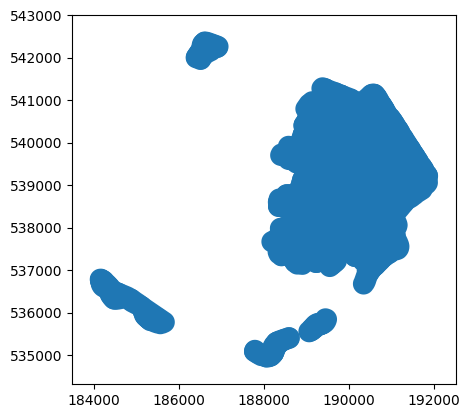

In [18]:
access_kartering.gdf.buffer(250).plot()

In [17]:
from veg2hab.functionele_samenhang import _extract_elmid_perc_habtype, _cluster_vlakken
a = _cluster_vlakken(access_kartering.gdf.buffer(150))

AttributeError: 'GeoSeries' object has no attribute 'columns'

In [13]:
from veg2hab.functionele_samenhang import _extract_elmid_perc_habtype, _cluster_vlakken
extracted = access_kartering.gdf.apply(_extract_elmid_perc_habtype, axis=1)
extracted = pd.concat(extracted.to_list(), ignore_index=True)

In [20]:
(extracted.percentage < 50).value_counts()

False    1945
True     1554
Name: percentage, dtype: int64

In [30]:
test = access_kartering.gdf.copy()
# test = test.iloc[:10]
test.VegTypeInfo
import geopandas as gpd
def _extract_elmid_perc_habtype(row: gpd.GeoSeries) -> gpd.GeoDataFrame:
    # (Elmid, cmplxdeel_n) | percentage | habitattype
    identifier = []
    percentage = []
    habtype = []
    geometry = []
    for idx, keuze in enumerate(row["HabitatKeuze"]):
        identifier.append((row["ElmID"], idx))
        percentage.append(row.VegTypeInfo[idx].percentage)
        habtype.append(keuze.habtype)
        geometry.append(row.geometry)
    return gpd.GeoDataFrame(
        {
            "identifier": identifier,
            "percentage": percentage,
            "habitattype": habtype,
            "geometry": geometry,
        }
    )

# Apply the function to each row
result = test.apply(_extract_elmid_perc_habtype, axis=1)

# Concatenate the resulting DataFrames
result = pd.concat(result.tolist(), ignore_index=True)
print(type(result))
result

AttributeError: module 'geopandas' has no attribute 'concat'

### De kartering formatten als een Habitattypenkartering

Dit pakt de HabitatVoorstellen uit en format het geheel als een Habitattypenkartering zoals beschreven in Gegevens Leverings Protocol (uitvraag bijlage 3a).

Voor nu checken we nog geen mitsen en mozaiek en wordt voor ieder VegTypeInfo het eerste HabitatVoorstel gebruikt.

In [ ]:
final_format = access_kartering.as_final_format()
final_format

In [ ]:
access_kartering.final_format_to_file(Path("../testing/veg2hab_output.shp"))